# Get SNP file and calculate some statistics

This tutorial is based on a SNP dataset extracted from the 3000 Rice genome project. For limiting time of computation, we restricted the dataset to chr1 for 60 individuals (30 indica and 30 japonica).

#### Create a new directory 'rice3k' for this analysis

In [1]:
mkdir /home/jovyan/rice3k
cd /home/jovyan/rice3k

mkdir: cannot create directory ‘/home/jovyan/rice3k’: File exists


#### Download the VCF dataset

The wget command allows to download any dataset available on the web, through a URL

In [2]:
wget https://itrop.ird.fr/sv-training/out.vcf.gz

--2022-09-07 13:28:13--  https://itrop.ird.fr/sv-training/out.vcf.gz
Resolving itrop.ird.fr (itrop.ird.fr)... 91.203.35.184
Connecting to itrop.ird.fr (itrop.ird.fr)|91.203.35.184|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1678691 (1.6M) [application/x-gzip]
Saving to: ‘out.vcf.gz’

out.vcf.gz          100%[===================>]   1.60M  --.-KB/s    in 0.1s    

2022-09-07 13:28:14 (15.0 MB/s) - ‘out.vcf.gz’ saved [1678691/1678691]



#### Some statistics about SNPs

Count the number of variants with `bcftools stat`
- Run the bcftools stats on the vcf file and save the result into the file `SNP_statistics.txt`
- How many samples were used for this SNP analysis ?
- How many SNPs were detected ? Is there any other easy way to identify the number of variants in VCF file?
- What is the ratio transition/transversion?

In [4]:
bcftools stats out.vcf.gz >SNP_statistics.txt

#### Calculate allele frequency

Calculate allele frequency of each position using `vcftools`

--freq2 : outputs the frequencies without information about the alleles

--freq would return their identity

--max-alleles 2 to exclude sites that have more than two alleles.

Compare outputs between these two options

In [9]:
vcftools --gzvcf out.vcf.gz --freq --out AF --max-alleles 2


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf out.vcf.gz
	--max-alleles 2
	--freq
	--out AF

Using zlib version: 1.2.11
After filtering, kept 60 out of 60 Individuals
Outputting Frequency Statistics...
After filtering, kept 119202 out of a possible 119202 Sites
Run Time = 2.00 seconds


In [8]:
vcftools --gzvcf out.vcf.gz --freq2 --out AF2 --max-alleles 2


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf out.vcf.gz
	--max-alleles 2
	--freq2
	--out AF2

Using zlib version: 1.2.11
After filtering, kept 60 out of 60 Individuals
Outputting Frequency Statistics...
After filtering, kept 119202 out of a possible 119202 Sites
Run Time = 2.00 seconds


# Annotate your SNPs

### Install and configure snpEff

We will use `snpEff` software to perform SNP annotation. 

SNP annotation consists of predicting the effects of genetic variants on genes and proteins (such as amino acid changes).

First, download and unzip the snpEff archive.

In [2]:
wget https://netix.dl.sourceforge.net/project/snpeff/snpEff_v4_3t_core.zip
unzip snpEff_v4_3t_core.zip

--2022-09-07 14:33:39--  https://netix.dl.sourceforge.net/project/snpeff/snpEff_v4_3t_core.zip
Resolving netix.dl.sourceforge.net (netix.dl.sourceforge.net)... 87.121.121.2
Connecting to netix.dl.sourceforge.net (netix.dl.sourceforge.net)|87.121.121.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69708122 (66M) [application/octet-stream]
Saving to: ‘snpEff_v4_3t_core.zip’

snpEff_v4_3t_core.z 100%[===================>]  66.48M  40.1MB/s    in 1.7s    

2022-09-07 14:33:41 (40.1 MB/s) - ‘snpEff_v4_3t_core.zip’ saved [69708122/69708122]

Archive:  snpEff_v4_3t_core.zip
   creating: snpEff/
   creating: snpEff/galaxy/
  inflating: snpEff/galaxy/snpEff.xml  
  inflating: snpEff/galaxy/snpSift_caseControl.xml  
  inflating: snpEff/galaxy/snpEff_download.xml  
  inflating: snpEff/galaxy/snpEffWrapper.pl  
  inflating: snpEff/galaxy/snpSift_filter.xml  
  inflating: snpEff/galaxy/snpSift_int.xml  
  inflating: snpEff/galaxy/snpSift_annotate.xml  
  inflating: snpEf

#### Look at the different genomes available for Rice

In order to annotate a VCF file, the program needs to know the location of genes in the genome on which the SNP are positionned.

First, we will have to configure a new database corresponding to Oryza sativa Nipponbare (used as reference to generate the VCF file)

In [4]:
java -jar snpEff/snpEff.jar databases | grep Oryza

Oryza_barthii                                               	Oryza_barthii                                               	          	ENSEMBL_BFMPP_32_268          	http://downloads.sourceforge.net/project/snpeff/databases/v4_3/snpEff_v4_3_ENSEMBL_BFMPP_32_268.zip
Oryza_brachyantha                                           	Oryza_brachyantha                                           	          	ENSEMBL_BFMPP_32_268          	http://downloads.sourceforge.net/project/snpeff/databases/v4_3/snpEff_v4_3_ENSEMBL_BFMPP_32_268.zip
Oryza_glaberrima                                            	Oryza_glaberrima                                            	          	ENSEMBL_BFMPP_32_268          	http://downloads.sourceforge.net/project/snpeff/databases/v4_3/snpEff_v4_3_ENSEMBL_BFMPP_32_268.zip
Oryza_glumaepatula                                          	Oryza_glumaepatula                                          	          	ENSEMBL_BFMPP_32_268          	http://downloads.sourceforge.net/project/snp

#### Download database for Rice (oryza_sativa)

The download of a new genome and its annotation may take a while

In [6]:
java -jar snpEff/snpEff.jar download Oryza_sativa

Let's have a look to the files that have been retrieved. What are they?

#### Annotate the VCF variant file (using the Rice genome)

In [13]:
java -jar snpEff/snpEff.jar eff Oryza_sativa out.vcf.gz >out.annotated.vcf

Look the new annotated VCF file, to see how the variants were annotated.

#### Look at the resulting HTML snpEff output

<img src="snpeff_output.png" align="center" width="70%" style="display: block; margin: auto;"/> 

# Play with SNPs and genotyping information

#### Install Plink software

In [8]:
cd /home/jovyan/rice3k
wget https://s3.amazonaws.com/plink1-assets/plink_linux_x86_64_20220402.zip
unzip plink_linux_x86_64_20220402.zip

--2022-09-07 15:21:30--  https://s3.amazonaws.com/plink1-assets/plink_linux_x86_64_20220402.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.36.102
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.36.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8948563 (8.5M) [application/zip]
Saving to: ‘plink_linux_x86_64_20220402.zip’

plink_linux_x86_64_ 100%[===================>]   8.53M  9.86MB/s    in 0.9s    

2022-09-07 15:21:32 (9.86 MB/s) - ‘plink_linux_x86_64_20220402.zip’ saved [8948563/8948563]

Archive:  plink_linux_x86_64_20220402.zip
  inflating: plink                   
  inflating: LICENSE                 
  inflating: toy.ped                 
  inflating: toy.map                 
  inflating: prettify                


#### Evaluate level of missing data (by sample, by positions)

In [9]:
./plink -vcf out.vcf.gz --missing

PLINK v1.90b6.26 64-bit (2 Apr 2022)           www.cog-genomics.org/plink/1.9/
(C) 2005-2022 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink.log.
Options in effect:
  --missing
  --vcf out.vcf.gz

3933 MB RAM detected; reserving 1966 MB for main workspace.
--vcf: plink-temporary.bed + plink-temporary.bim + plink-temporary.fam written.
119202 variants loaded from .bim file.
60 people (0 males, 0 females, 60 ambiguous) loaded from .fam.
Ambiguous sex IDs written to plink.nosex .
Using 1 thread.
Before main variant filters, 60 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.986788.
--missing: Sample missing data report written to plink.imiss, and variant-based
missing data report written to plink.lmiss.


##### Plink generates 2 files. What information do they contain?

In [10]:
awk -F " " {'print $1"\t"$4'} plink.imiss | sort -n -k2 >missing.txt

In [11]:
head plink.imiss

             FID              IID MISS_PHENO   N_MISS   N_GENO   F_MISS
            B009             B009          Y      380   119202 0.003188
            B010             B010          Y      385   119202  0.00323
            B015             B015          Y       47   119202 0.0003943
            B024             B024          Y      344   119202 0.002886
            B059             B059          Y      914   119202 0.007668
            B060             B060          Y      811   119202 0.006804
            B061             B061          Y      431   119202 0.003616
            B062             B062          Y     1250   119202  0.01049
            B063             B063          Y      183   119202 0.001535


In [12]:
head plink.lmiss

 CHR        SNP   N_MISS   N_GENO   F_MISS
   1       1579        0       60        0
   1       1695        0       60        0
   1       1708        0       60        0
   1       1748        1       60  0.01667
   1       1794        1       60  0.01667
   1       1872        0       60        0
   1       1948        1       60  0.01667
   1       1953        1       60  0.01667
   1       2065        1       60  0.01667


#### Distribution of missing levels across positions

Using a `awk` command, very usefull for filtering tabulated file, we will extract positions (column 2) and the number of missing individuals for each position (column 3)

In [13]:
awk -F " " {'print $1"_"$2"\t"$3'} plink.lmiss >missing_by_snp.txt

A short python script, using the pandas module, enables to display the distribution of missing data as an histogram. 

array([[<AxesSubplot:title={'center':'N_MISS'}>]], dtype=object)

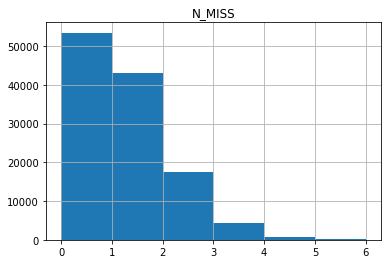

In [5]:
import pandas as pd
  
df = pd.read_table('/home/jovyan/rice3k/missing_by_snp.txt',delimiter='\t')

df.hist(column='N_MISS',bins=6)

#### Generate PCA using genotyping information contained in VCF

`Plink` alllows to create a PCA (principal components analysis) of samples, so that we can easily evaluate genetic distance between samples. 

This will generate a matrix of coordinates in the different component. By default, it provides the first 20 principal components of the variance-standardized relationship matrix. We will focus only the first 3 axes for subsequent visualization (`--pca 3`)

In [2]:
cd /home/jovyan/rice3k
./plink -vcf out.vcf.gz --cluster --matrix --pca 3

PLINK v1.90b6.26 64-bit (2 Apr 2022)           www.cog-genomics.org/plink/1.9/
(C) 2005-2022 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink.log.
Options in effect:
  --cluster
  --matrix
  --pca 3
  --vcf out.vcf.gz

Note: --matrix flag deprecated.  Migrate to "--distance ibs flat-missing",
"--r2 square", etc.
3933 MB RAM detected; reserving 1966 MB for main workspace.
--vcf: plink-temporary.bed + plink-temporary.bim + plink-temporary.fam written.
119202 variants loaded from .bim file.
60 people (0 males, 0 females, 60 ambiguous) loaded from .fam.
Ambiguous sex IDs written to plink.nosex .
Using 1 thread.
Before main variant filters, 60 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.986788.
119202 variants and 60 people

#### Visualize PCA (using Pandas)

With simple bash commands (`awk`), we first format a matrix dataset for Pandas, including names of sample in the first colum and coordinates X and Y. We can redirect the command to a new file called `pca.txt`.

In [3]:
echo "Samples PCA1 PCA2" >pca.txt
awk -F " " {'print $1" "$3" "$4'}  plink.eigenvec >>pca.txt

##### Download the metadata files

In a second step, we want to add the genetic group information of each of the samples.
To do so, we need to download metadata file (available here https://sniplay.southgreen.fr/examples/3K_RGP.accessions.txt) and merge it (with python) to the `pca.txt` file.

In [4]:
wget https://sniplay.southgreen.fr/examples/3K_RGP.accessions.txt

--2022-09-08 06:23:37--  https://sniplay.southgreen.fr/examples/3K_RGP.accessions.txt
Resolving sniplay.southgreen.fr (sniplay.southgreen.fr)... 193.51.117.74
Connecting to sniplay.southgreen.fr (sniplay.southgreen.fr)|193.51.117.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57858 (57K) [text/plain]
Saving to: ‘3K_RGP.accessions.txt’

3K_RGP.accessions.t 100%[===================>]  56.50K  --.-KB/s    in 0.01s   

2022-09-08 06:23:38 (4.61 MB/s) - ‘3K_RGP.accessions.txt’ saved [57858/57858]



##### Use python/pandas to visualise (switch to python kernel)

With a simple python script using the pandas library, we can merge the pca matrix with the metadata file (using `inner join` on the common field called "Samples" found in the two files to be joinned). 

Using the `plot.scatter` function, we can visualize the pca and colorize samples according to their genetic group (indica=ind1A in red, japx in green).

Do not forget to switch to python kernell

<AxesSubplot:xlabel='PCA1', ylabel='PCA2'>

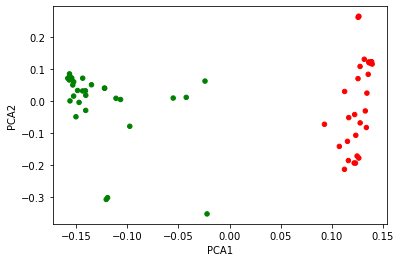

In [2]:
import pandas as pd
  
df1 = pd.read_table('/home/jovyan/rice3k/pca.txt',delimiter=' ')

df2 = pd.read_table('/home/jovyan/rice3k/3K_RGP.accessions.txt',delimiter=';')

df_cd = pd.merge(df1, df2, how='inner', left_on = 'Samples', right_on = '3K_DNA_IRIS_UNIQUE_ID')

#print(df_cd)
df_cd.to_csv('/home/jovyan/rice3k/groups', index=False)
colors = {'ind1A':'red', 'japx':'green'}
df_cd.plot.scatter(x='PCA1', y='PCA2',c= df_cd['TYPE'].map(colors),cmap='viridis')


#### SNP density along chromosome

We will make use of `vcftools` to calculate the density of variants along the chromosome 1 of Japonica rice, in sliding windows. To do so, we will set a 100kb sliding window to the option `--SNPdensity`

In [2]:
cd /home/jovyan/rice3k
vcftools --gzvcf out.vcf.gz --SNPdensity 100000


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf out.vcf.gz
	--SNPdensity 100000

Using zlib version: 1.2.11
After filtering, kept 60 out of 60 Individuals
Outputting SNP density
After filtering, kept 119202 out of a possible 119202 Sites
Run Time = 0.00 seconds


In [3]:
head out.snpden

CHROM	BIN_START	SNP_COUNT	VARIANTS/KB
1	0	382	3.82
1	100000	268	2.68
1	200000	145	1.45
1	300000	129	1.29
1	400000	277	2.77
1	500000	262	2.62
1	600000	117	1.17
1	700000	355	3.55
1	800000	9	0.09


### Visualize SNP density using Circos

Be carefull, this version of Circos requires to be located in the circos directory

Install Circos and go in the Circos directory to run it

##### Install Circos in the terminal by typing these commands

cd ~

git clone https://github.com/vigsterkr/circos.git

cd circos

./install-unix

conda create -n circos -c bioconda perl-config-general perl-gd perl-math-bezier perl-math-round perl-math-vecstat perl-params-validate perl-readonly perl-set-intspan

#### Generate input file for circos

With a simple bash command (`awk`), create the input data file for Circos for visualzation of line plot (space separated format: chr start end value). The file must be named `density.tyxt`

In [4]:
cd /home/jovyan/rice3k
awk {'print $1" "$2" "$2" "$3'} out.snpden | grep -v BIN_START >density.txt

Go to the Circos directory and download an example of circos configuration file available at https://sniplay.southgreen.fr/examples/circos1.conf

In [5]:
cd ~/circos
wget https://sniplay.southgreen.fr/examples/circos1.conf

--2022-09-08 07:43:33--  https://sniplay.southgreen.fr/examples/circos1.conf
Resolving sniplay.southgreen.fr (sniplay.southgreen.fr)... 193.51.117.74
Connecting to sniplay.southgreen.fr (sniplay.southgreen.fr)|193.51.117.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1893 (1.8K) [text/plain]
Saving to: ‘circos1.conf’

circos1.conf        100%[===================>]   1.85K  --.-KB/s    in 0s      

2022-09-08 07:43:34 (7.62 MB/s) - ‘circos1.conf’ saved [1893/1893]



##### Create a karyotype file indicating the lengths and names of chromosomes

Try to guess the length of the chromosome1 to indicate in the karyotype file. For instance by using the `tail` command on `density.txt` file

In [11]:
tail -1 /home/jovyan/rice3k/density.txt

1 43200000 43200000 101


Write into a karyotype file called `karyotype.txt`, the size and color of the chromosome 1.

In [15]:
cd /home/jovyan/rice3k
echo "chr - 1 1 0 43200000 black" >karyotype.txt

##### Edit the Circos configuration file to adapt the data file names. And run Circos as follows:

Activate the conda environnement for Circos before running circos

In [16]:
cd ~/circos
conda activate circos
bin/circos --conf circos1.conf
conda deactivate

(circos) debug: using configuration file input circos1.conf
debuglib: using configuration input circos1.conf
debuglib: loading configuration from file circos1.conf
debugload: using file from argument circos1.conf
debugfile: looking for configuration file circos1.conf
debugfile: found configuration file circos1.conf
zoomregion ideogram 0 chr 1         0  43200000 scale  1.00 absolutescale  1.00
registering tag 1
ideogramspacing 1 1 1 1 1080.000025
ideogramreport   0     1   0     1      0.000  43200.000  43200.001       0.000       0.000 r 1350 1340 1350 10
drawing ticks 1 radius 1350 type absolute spacing 1000000
drawing ticks 1 radius 1350 type absolute spacing 100000
drawing plot type histogram at z-depth 0
created image at ./circos.png
(circos) 

### Comparison of populations using FST

FST is an index that reflect the level of differenciation between populations. We will calculate FST values for each variant in order to know if they can dissociate specific alleles of the two population ind1B and japx.

Using `grep` and `awk`, create two distinct file (called `pop1` and `pop2`) listing the names of accessions that are assigned to each group

In [9]:
cd /home/jovyan/rice3k
grep ind1A 3K_RGP.accessions.txt | awk -F ";" {'print $1'} >pop1
grep japx 3K_RGP.accessions.txt | awk -F ";" {'print $1'} >pop2

We will use `vcftools` for the calculation of FST. It can be calculated by specifying population files to the option `--weir-fst-pop`

In [10]:
vcftools --gzvcf out.vcf.gz --weir-fst-pop pop1 --weir-fst-pop pop2


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf out.vcf.gz
	--weir-fst-pop pop1
	--weir-fst-pop pop2
	--keep pop1
	--keep pop2

Using zlib version: 1.2.11
Keeping individuals in 'keep' list
After filtering, kept 60 out of 60 Individuals
Outputting Weir and Cockerham Fst estimates.
Weir and Cockerham mean Fst estimate: 0.46204
Weir and Cockerham weighted Fst estimate: 0.6612
After filtering, kept 119202 out of a possible 119202 Sites
Run Time = 2.00 seconds


In [5]:
tail out.weir.fst

1	43254106	0.649498
1	43254132	0.748866
1	43254181	0.560328
1	43254300	0.286511
1	43254513	0.445836
1	43255505	0.141379
1	43255617	0.141379
1	43269402	0.582643
1	43269449	0.255167
1	43269550	0.35192


Now, we want to look at the average of FST by sliding window along the chromosome, in order to detect potential regions showing a high level of differenciation between the two genetic groups. 

We can use the option `--fst-window-size` and define a 100kb size of window.

In [11]:
vcftools --gzvcf out.vcf.gz --weir-fst-pop pop1 --weir-fst-pop pop2 --fst-window-size 100000


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf out.vcf.gz
	--fst-window-size 100000
	--weir-fst-pop pop1
	--weir-fst-pop pop2
	--keep pop1
	--keep pop2

Using zlib version: 1.2.11
Keeping individuals in 'keep' list
After filtering, kept 60 out of 60 Individuals
Outputting Windowed Weir and Cockerham Fst estimates.
Weir and Cockerham mean Fst estimate: 0.46204
Weir and Cockerham weighted Fst estimate: 0.6612
After filtering, kept 119202 out of a possible 119202 Sites
Run Time = 2.00 seconds


In [12]:
head out.windowed.weir.fst

CHROM	BIN_START	BIN_END	N_VARIANTS	WEIGHTED_FST	MEAN_FST
1	1	100000	382	0.622881	0.549616
1	100001	200000	268	0.603637	0.491764
1	200001	300000	145	0.780704	0.611452
1	300001	400000	129	0.88753	0.774335
1	400001	500000	277	0.815848	0.711635
1	500001	600000	262	0.744546	0.59308
1	600001	700000	117	0.743666	0.601746
1	700001	800000	355	0.310809	0.282787
1	800001	900000	9	0.47269	0.300306


In [14]:
cd ~
awk {'print $1" "$2" "$2" "$3'} out.weir.fst | grep -v FST >fst.txt
awk {'print $1" "$2" "$2" "$6'} out.windowed.weir.fst | grep -v FST >fst_window.txt

(circos) (circos) (circos) 

: 1

In [ ]:
conda activate circos

#### Add a new track in Circos for FST means in sliding windows

Modify the Circos configuration file

In [35]:
cd ~/circos
bin/circos -conf circos1.conf

(circos) debug: using configuration file input circos1.conf
debuglib: using configuration input circos1.conf
debuglib: loading configuration from file circos1.conf
debugload: using file from argument circos1.conf
debugfile: looking for configuration file circos1.conf
debugfile: found configuration file circos1.conf
zoomregion ideogram 0 chr 1         0  46000000 scale  1.00 absolutescale  1.00
registering tag 1
ideogramspacing 1 1 1 1 1150.000025
ideogramreport   0     1   0     1      0.000  46000.000  46000.001       0.000       0.000 r 1350 1340 1350 10
drawing ticks 1 radius 1350 type absolute spacing 1000000
drawing ticks 1 radius 1350 type absolute spacing 100000
drawing plot type histogram at z-depth 0
drawing plot type line at z-depth 0
drawing plot type line at z-depth 0
drawing plot type histogram at z-depth 0
created image at ./circos.png
(circos) 

: 1

#### Compare SNP density between the 2 phylogroups

In [29]:
cd ~
vcftools --keep pop1 --gzvcf out.vcf.gz --out pop1 --recode --recode-INFO-all --maf 0.01
vcftools --keep pop2 --gzvcf out.vcf.gz --out pop2 --recode --recode-INFO-all --maf 0.01

(circos) 
VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf out.vcf.gz
	--keep pop1
	--recode-INFO-all
	--maf 0.01
	--out pop1
	--recode

Using zlib version: 1.2.11
Keeping individuals in 'keep' list
After filtering, kept 30 out of 60 Individuals
Outputting VCF file...
After filtering, kept 82263 out of a possible 119202 Sites
Run Time = 3.00 seconds
(circos) 
VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf out.vcf.gz
	--keep pop2
	--recode-INFO-all
	--maf 0.01
	--out pop2
	--recode

Using zlib version: 1.2.11
Keeping individuals in 'keep' list
After filtering, kept 30 out of 60 Individuals
Outputting VCF file...
After filtering, kept 97253 out of a possible 119202 Sites
Run Time = 2.00 seconds
(circos) 

: 1

In [32]:
vcftools --gzvcf pop1.recode.vcf --SNPdensity 100000 --out pop1
vcftools --gzvcf pop2.recode.vcf --SNPdensity 100000 --out pop2


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf pop1.recode.vcf
	--out pop1
	--SNPdensity 100000

Using zlib version: 1.2.11
After filtering, kept 30 out of 30 Individuals
Outputting SNP density
After filtering, kept 82263 out of a possible 82263 Sites
Run Time = 0.00 seconds
(circos) 
VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf pop2.recode.vcf
	--out pop2
	--SNPdensity 100000

Using zlib version: 1.2.11
After filtering, kept 30 out of 30 Individuals
Outputting SNP density
After filtering, kept 97253 out of a possible 97253 Sites
Run Time = 1.00 seconds
(circos) 

: 1

In [33]:
awk {'print $1" "$2" "$2" "$3'} pop1.snpden | grep -v BIN_START >pop1.density.txt
awk {'print $1" "$2" "$2" "$3'} pop2.snpden | grep -v BIN_START >pop2.density.txt

(circos) (circos) 

: 1

#### Add a new track in Circos for SNP density for the 2 populations in the same track

Modify the Circos configuration file (add the type line for this)

<img src="circos.png" align="center" width="70%" style="display: block; margin: auto;"/> 

#### Calculate the ratio transition/transversion (using vcftools option --TsTv)